In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import time

In [2]:
# rosenbrock banana - test for levelsets

In [3]:
def sigmoid(t):
    if t < -700:
        return 0
    else:
        return (1 + np.e**(-t))**(-1)
def h_cost(X):
    return - np.log(sigmoid(1 + X**2 + X**3))

def lin():
    """
    Where A is an array of inputs for 'x'
    """
    li = [0]*100
    Y = [0]*100
    O = [0]*100
    for i in range(-9,91):
        li[i] = random.random()*100
        y = h_cost(i)
        Y[i] = y + np.random.normal(0,3) #adding noise
        O[i] = [li[i],Y[i]]
    return O

A = lin()

xVec = np.random.rand(2,1)*100
temp = np.matmul(A,xVec)
b = temp + np.random.normal(0,100,temp.shape)

def f(X, a=A,B=b):
    return 0.5*np.linalg.norm(np.matmul(a,x)-B)**2

def f_grad(X,a=A, B=b):
    return np.matmul(np.array(A).transpose(),(np.matmul(a,X)-B))

def GD(x, lamb, gradient_function):
    x1 = x - lamb*gradient_function(x)
    return x1

In [15]:
sigmoid(5)

0.9933071490757153

<function matplotlib.pyplot.show(close=None, block=None)>

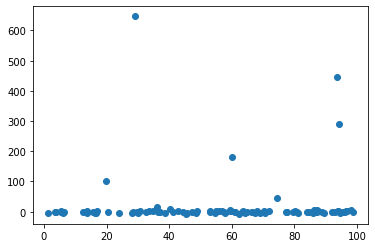

In [4]:
aaa = [0]*100
bbb = [0]*100
for i in range(100):
    aaa[i] = A[i][0]
    bbb[i] = A[i][1]
plt.scatter(aaa, bbb)
plt.show

\begin{align}
\text{min } \mathbf{x}: \\
f(\mathbf{x}) &= \frac{1}{2} \|A \mathbf{x} - b \|^2\\
\nabla f(\mathbf{\mathbf{x}}) &= A^T(A \mathbf{x} -b)\\
{\mathbf{x}}_{k+1} &= \mathbf{x}_k - \lambda_k \nabla f(\mathbf{x}_k)
\end{align}


Vanilla Gradient Descent

These are implemented as:

9190.5426984491
2620.6421658688196
1870.2116561783832
1334.6696792325654
952.482114406101
679.7353625241415
485.09064482958746
346.1831569679753
247.05233845588285
176.3079939278543
125.82155229571694
89.79208865921862
64.07979426981875
45.7303098188391
32.635267637154826
23.29003888108372
16.620850703946545
11.86140905769893
8.464851007208125
6.04090983039601
4.31107311274605
3.076581492723248
2.195591082209784
1.5668755114971231
1.1181949539100486
0.7979957220526461
0.5694867160146875
0.4064121032914335
0.29003450484300225
0.20698205895284358
0.14771198625224988
0.10541411697597618
0.07522839721032286
0.0536864691309935
0.03831315177253929
0.02734204019090188
0.019512546426000595
0.013925057329148498
0.009937565779729757
0.007091907615397888
0.005061113713260896
0.0036118450339441043
0.002577580124038685
0.001839480686660198
0.0013127383372525767
----------------------


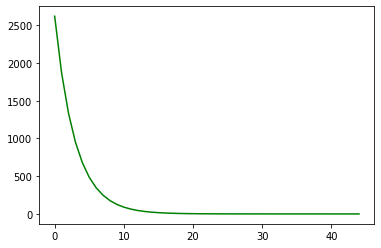

[[13.14158993]
 [99.12118811]]
[[ 0.00092517]
 [-0.00014735]]
Iterations: 46
Time taken: 0.23691320419311523
Lambda:  1.3200844603521773e-06


In [3]:
current = time.time()
X = []
L = np.max(np.linalg.svd(np.matmul(A,np.array(A).transpose()))[1])
lamb = 1/L
x = xVec
gr = []
count = 1
while np.linalg.norm(f_grad(x)) > 1e-3:
    print(np.linalg.norm(f_grad(x)))
    x1 = GD(x,lamb,f_grad)
    x = x1
    X.append(f(x))
    gr.append(np.linalg.norm(f_grad(x)))
    count += 1
print('----------------------')
plt.plot(range(len(gr)), gr, c='g')
plt.show()
print(x)
print(f_grad(x))
print('Iterations:', count)
print('Time taken:', time.time() - current)
print('Lambda: ', lamb)

In [4]:
def predict( beta, X):
    predP = sigmoid(beta, X) # predict classification probability 
    predVal = np.where(predP >= 0.5 , 1 , 0) # allocate most likely classifier
    return np.squeeze(predVal)

Adaptive Gradient Descent

lambda initial:  0.2321752568187928
theta intial: 100000
x intial: [[32.69858744]
 [67.29832367]]
x1 intial: [[5091.77671778]
 [2227.33194271]]
min1: 73.42062988858866
min2: 1.3188558760169915e-06
lambda:  1.3188558760169915e-06
x1: [[32.72732519]
 [67.3105936 ]]
x: [[5091.77671778]
 [2227.33194271]]
theta: 5.680432506407549e-06
Gradient Norm: 13415.79514256153
min1: 1.3188596218475667e-06
min2: 1.3188558760169913e-06
lambda:  1.3188558760169913e-06
x1: [[3139.58209377]
 [ 289.86437096]]
x: [[32.72732519]
 [67.3105936 ]]
theta: 0.9999999999999999
Gradient Norm: 945744746.8856435
min1: 1.8651438666786784e-06
min2: 1.6467294737663794e-06
lambda:  1.6467294737663794e-06
x1: [[32.74936091]
 [67.31217209]]
x: [[3139.58209377]
 [ 289.86437096]]
theta: 1.248604569848513
Gradient Norm: 6708.028263756279
min1: 2.469328126531815e-06
min2: 1.6467294737663794e-06
lambda:  1.6467294737663794e-06
x1: [[1586.68305546]
 [ 171.73330355]]
x: [[32.74936091]
 [67.31217209]]
theta: 1.0
Gradient Norm: 47287

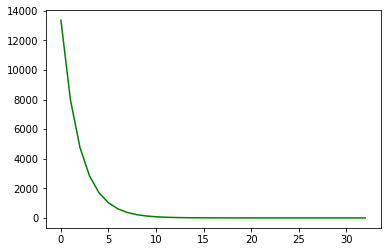

x value [[32.77177346]
 [67.31369776]]
Gradient [[112.47715907]
 [  7.72099286]]
Iterations: 50
Time taken: 0.2932307720184326


In [113]:
current = time.time()
X =[]
lam = random.random()
print('lambda initial: ',lam)
theta = 100000
print('theta intial:', theta)
x = xVec
print('x intial:', x)
x1 = GD(x,lam,f_grad)
print('x1 intial:', x1)
gr2 = []
count =1
while np.linalg.norm(f_grad(x1)) > 1e-3:
    lam_prev = lam
    min1 = np.sqrt(1 + theta)*lam
    min2 = (np.linalg.norm(x1 - x))/(2*np.linalg.norm(f_grad(x1) - f_grad(x)))
    print('min1:', min1)
    print('min2:', min2)
    lam = np.min([min1, min2])
    print('lambda: ',lam)
    temp = x1
    x1 = GD(x, lam, f_grad)
    print('x1:', x1)
    x = temp
    print('x:', x)
    theta = (lam/lam_prev)
    print('theta:', theta)
    count += 1
    grad = np.linalg.norm(f_grad(x1))
    print('Gradient Norm:', grad)
    gr2.append(grad)
print('----------------------')
plt.plot(range(len(gr)), gr, c='g')
plt.show()
print('x value', x)
print('Gradient', f_grad(x))
print('Iterations:', count)
print('Time taken:', time.time() - current)

In [28]:
print('Generating x:', xVec)

Generating x: [[86.6176915 ]
 [71.23064329]]


In [39]:
np.e

2.718281828459045

In [44]:
np.log(np.e)

1.0

In [40]:
def sigmoid(x):
    return 1/(1 + np.e**(-x))
def h_cost(X):
    return - np.log(sigmoid(1 + X**2 + X**3))

In [41]:
sigmoid(x)

array([[0.99993949],
       [0.99917529]])

In [51]:
h_cost(A)

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'